In [1]:
from textblob import TextBlob
import nltk
nltk.download('punkt')
nltk.download('stopwords') # For removing common words
nltk.download('averaged_perceptron_tagger') # For Part-of-Speech tagging (used in lemmatization)
nltk.download('wordnet') # For lemmatization
! python -m textblob.download_corpora
# Sample reviews with associated sentiment (as provided)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\alexi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\alexi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\alexi\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\alexi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Finished.


[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\alexi\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\alexi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\alexi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\alexi\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to
[nltk_data]     C:\Users\alexi\AppData\Roaming\nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\alexi\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is alr

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("./datasets/amazon_review.csv")
df

,reviewText,Positive
0,This is a one of the best apps acording to a b...,1
1,This is a pretty good version of the game for ...,1
2,this is a really cool game. there are a bunch ...,1
3,"This is a silly game and can be frustrating, b...",1
4,This is a terrific game on any pad. Hrs of fun...,1
...,...,...
19995,this app is fricken stupid.it froze on the kin...,0
19996,Please add me!!!!! I need neighbors! Ginger101...,1
19997,love it! this game. is awesome. wish it had m...,1
19998,I love love love this app on my side of fashio...,1




1.   Can you perform a sentiment analysis on the collection of product reviews, classify each one as 'positive', 'negative', or 'neutral', and then generate a bar chart to visualize the distribution of these sentiments?"

2.   convert the text to lowercase, remove punctuation and numbers, filter out common stopwords, and then lemmatize the remaining words using their appropriate part-of-speech tags.
3. fter the text has been fully preprocessed and lemmatized, could you calculate the frequency of each unique word and then display a bar graph showing the top 15 most common words?
4. generate a word cloud based on the entire corpus of lemmatized review words to provide a visual summary of the most prominent terms.
5. Visualize the frequency of nouns, verbs, adjectives in this text.



C:\Users\alexi\AppData\Local\Temp\ipykernel_17572\2765292456.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Sentiment', palette='viridis')


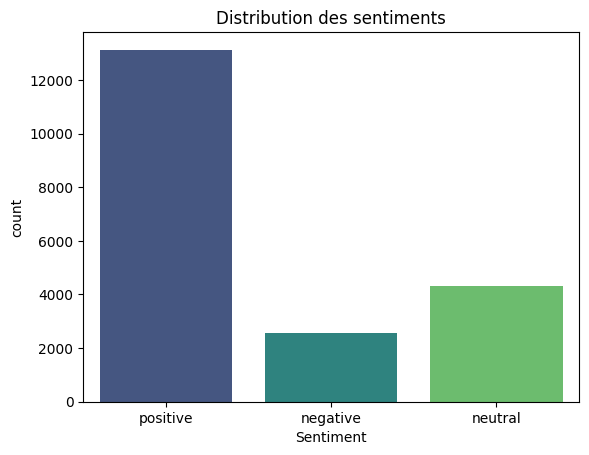

In [4]:
def get_sentiment(text):
    blob = TextBlob(str(text))
    polarity = blob.sentiment.polarity
    if polarity > 0.1:
        return 'positive'
    elif polarity < -0.1:
        return 'negative'
    else:
        return 'neutral'

df['Sentiment'] = df['reviewText'].apply(get_sentiment)

# Graphe des sentiments
sns.countplot(data=df, x='Sentiment', palette='viridis')
plt.title("Distribution des sentiments")
plt.show()

In [5]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize, pos_tag

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Fonction pour transformer les tags NLTK en tags WordNet
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return 'a'  # adjectif
    elif tag.startswith('V'):
        return 'v'  # verbe
    elif tag.startswith('N'):
        return 'n'  # nom
    elif tag.startswith('R'):
        return 'r'  # adverbe
    else:
        return 'n'

def preprocess(text):
    text = str(text).lower()  # minuscules
    text = re.sub(r"[^a-z\s]", "", text)  # supprime la ponctuation et les chiffres
    tokens = word_tokenize(text)  # tokenisation
    tokens = [t for t in tokens if t not in stop_words]  # suppression des stopwords
    pos_tags = pos_tag(tokens)  # POS tag
    lemmatized = [lemmatizer.lemmatize(word, get_wordnet_pos(tag)) for word, tag in pos_tags]  # lemmatisation
    return lemmatized

df['lemmatized'] = df['reviewText'].apply(preprocess)
df[['reviewText', 'lemmatized']].head()


,reviewText,lemmatized
0,This is a one of the best apps acording to a b...,"[one, best, apps, acording, bunch, people, agr..."
1,This is a pretty good version of the game for ...,"[pretty, good, version, game, free, lot, diffe..."
2,this is a really cool game. there are a bunch ...,"[really, cool, game, bunch, level, find, golde..."
3,"This is a silly game and can be frustrating, b...","[silly, game, frustrate, lot, fun, definitely,..."
4,This is a terrific game on any pad. Hrs of fun...,"[terrific, game, pad, hr, fun, grandkids, love..."


C:\Users\alexi\AppData\Local\Temp\ipykernel_17572\2732985034.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(counts), palette="crest")


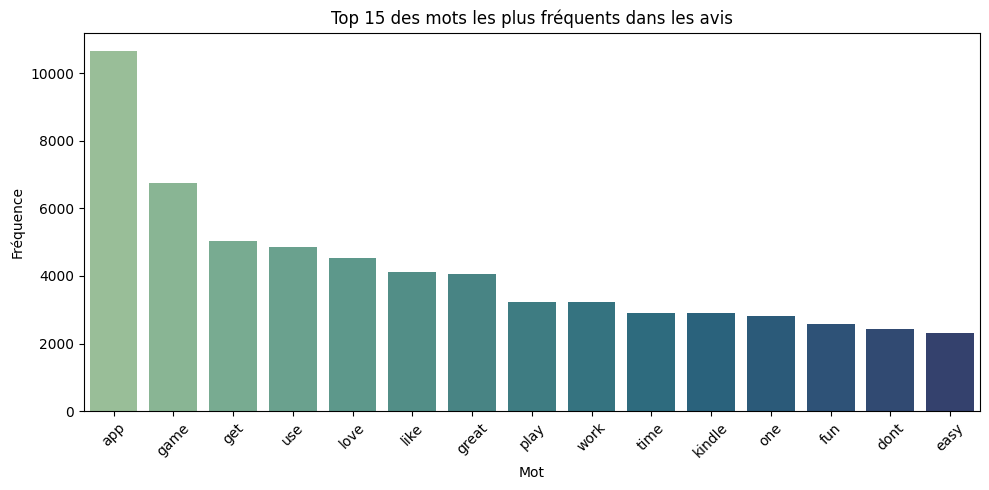

In [6]:
from collections import Counter


# Compter tous les mots lemmatisés dans tous les avis
all_words = [word for tokens in df['lemmatized'] for word in tokens]
common_words = Counter(all_words).most_common(15)

# Visualisation
words, counts = zip(*common_words)
plt.figure(figsize=(10, 5))
sns.barplot(x=list(words), y=list(counts), palette="crest")
plt.title("Top 15 des mots les plus fréquents dans les avis")
plt.ylabel("Fréquence")
plt.xlabel("Mot")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


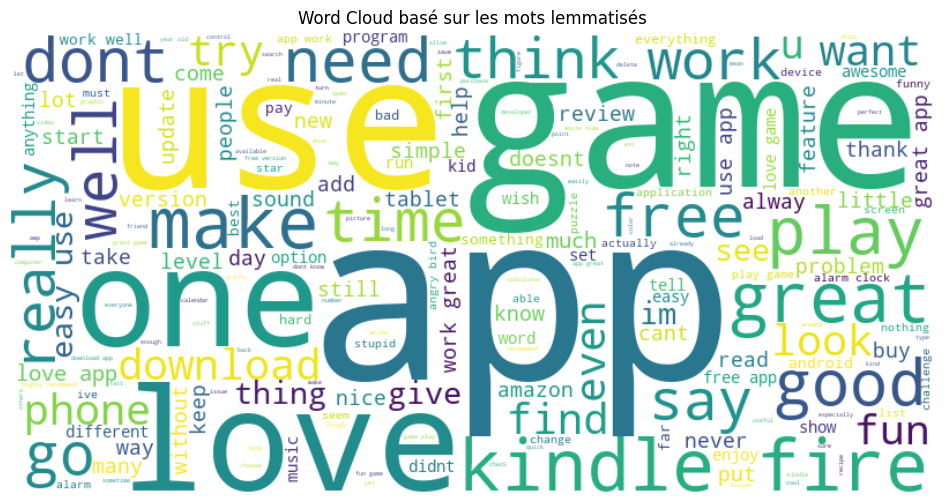

In [8]:
from wordcloud import WordCloud

# Rejoindre tous les mots en une chaîne de caractères
all_text = ' '.join(all_words)

# Créer et afficher le nuage de mots
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud basé sur les mots lemmatisés")
plt.show()


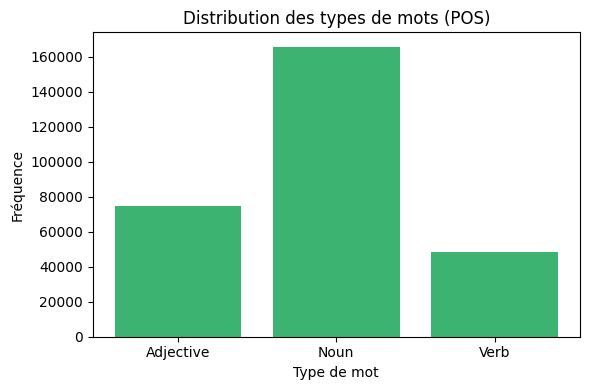

In [9]:
from collections import defaultdict
from nltk import pos_tag

# Compter types de mots (POS) : nom, verbe, adjectif
pos_counts = defaultdict(int)

for tokens in df['lemmatized']:
    tagged = pos_tag(tokens)
    for _, tag in tagged:
        if tag.startswith('N'):
            pos_counts['Noun'] += 1
        elif tag.startswith('V'):
            pos_counts['Verb'] += 1
        elif tag.startswith('J'):
            pos_counts['Adjective'] += 1

plt.figure(figsize=(6,4))
plt.bar(pos_counts.keys(), pos_counts.values(), color='mediumseagreen')
plt.title("Distribution des types de mots (POS)")
plt.xlabel("Type de mot")
plt.ylabel("Fréquence")
plt.tight_layout()
plt.show()
